# تعیین تعداد نورون شبکه تک لایه

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import cPickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
%matplotlib inline 

Definding function:

In [2]:
# this function give file of data  as numpy array or image

def getImageData(filename):
    f = open(filename,'rb')
    datadict = cPickle.load(f,encoding='latin1') #Why the hell latin1 ???
    f.close()
    X=datadict['data'].reshape((len(datadict['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    return X


# this function give file of data  as dictionary


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

laod one bacth of data and check it

shape of input image: (10000, 32, 32, 3)
#############################################
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of target vector: (10000, 10)


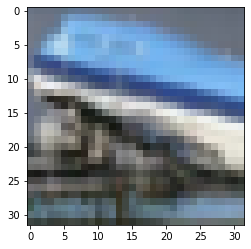

In [67]:
file='cifar-10-batches-py\data_batch_3'

X_image = getImageData(file)
x=unpickle(file)


print('shape of input image:',X_image.shape)
print('#############################################')
plt.imshow(X_image[35])


#geting vector  of target of data:
y=x[b'labels']
y_train=to_categorical(y)
print(y_train[35])
print('shape of target vector:',y_train.shape)

preprocess data: step one:

In [68]:
x_flatten=X_image.reshape(10000,-1)

x_train=x_flatten/255

# Constructing model:

در این قسمت با تغییر تعداد لایه وسط که در حال حاضر برابر با 50 است آزمایش ها را انجام داده

In [76]:


model=Sequential()



model.add(Dense(500,activation='relu',input_dim=3072))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 500)               1536500   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5010      
Total params: 1,541,510
Trainable params: 1,541,510
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [78]:
history=model.fit(x_train,y_train,validation_split=0.1,batch_size=128,epochs=75)

Epoch 1/75
71/71 [==============================] - 1s 8ms/step - loss: 2.2132 - accuracy: 0.2267 - val_loss: 1.9464 - val_accuracy: 0.3140
Epoch 2/75
71/71 [==============================] - 0s 7ms/step - loss: 1.8863 - accuracy: 0.3293 - val_loss: 1.8880 - val_accuracy: 0.3100
Epoch 3/75
71/71 [==============================] - 0s 6ms/step - loss: 1.8040 - accuracy: 0.3638 - val_loss: 1.9522 - val_accuracy: 0.3110
Epoch 4/75
71/71 [==============================] - 0s 7ms/step - loss: 1.7635 - accuracy: 0.3742 - val_loss: 1.8272 - val_accuracy: 0.3230
Epoch 5/75
71/71 [==============================] - 0s 7ms/step - loss: 1.7126 - accuracy: 0.3972 - val_loss: 1.7814 - val_accuracy: 0.3570
Epoch 6/75
71/71 [==============================] - 0s 7ms/step - loss: 1.6790 - accuracy: 0.4078 - val_loss: 1.7430 - val_accuracy: 0.3870
Epoch 7/75
71/71 [==============================] - 0s 7ms/step - loss: 1.6514 - accuracy: 0.4144 - val_loss: 1.7497 - val_accuracy: 0.3860
Epoch 8/75
71/71 [==

71/71 [==============================] - 0s 6ms/step - loss: 0.6322 - accuracy: 0.8102 - val_loss: 1.7041 - val_accuracy: 0.4410
Epoch 60/75
71/71 [==============================] - 0s 6ms/step - loss: 0.6136 - accuracy: 0.8211 - val_loss: 1.7296 - val_accuracy: 0.4440
Epoch 61/75
71/71 [==============================] - 0s 6ms/step - loss: 0.6039 - accuracy: 0.8273 - val_loss: 1.7590 - val_accuracy: 0.4400
Epoch 62/75
71/71 [==============================] - 0s 6ms/step - loss: 0.5788 - accuracy: 0.8330 - val_loss: 1.7765 - val_accuracy: 0.4330
Epoch 63/75
71/71 [==============================] - 0s 7ms/step - loss: 0.5736 - accuracy: 0.8350 - val_loss: 1.7163 - val_accuracy: 0.4520
Epoch 64/75
71/71 [==============================] - 0s 6ms/step - loss: 0.5416 - accuracy: 0.8508 - val_loss: 1.8127 - val_accuracy: 0.4330
Epoch 65/75
71/71 [==============================] - 0s 7ms/step - loss: 0.5348 - accuracy: 0.8521 - val_loss: 1.8144 - val_accuracy: 0.4340
Epoch 66/75
71/71 [======

Plotting learn curves:

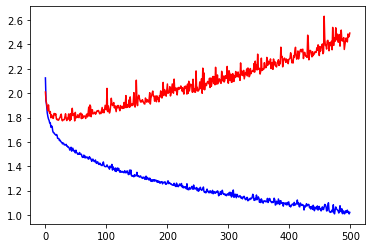

In [72]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.show()

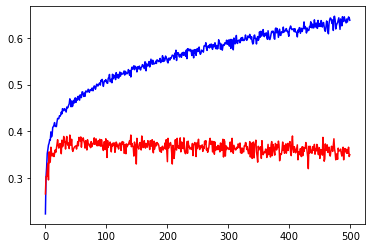

In [73]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.show()

In [74]:
print('max acc of validation:',max(history.history['val_accuracy']))

max acc of validation: 0.3919999897480011


In [75]:
print('max acc of trian:',max(history.history['accuracy']))

max acc of trian: 0.6462222337722778
